In [6]:
import yulewalker as yw
import scipy.signal 
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Bandpass filter mangitude')

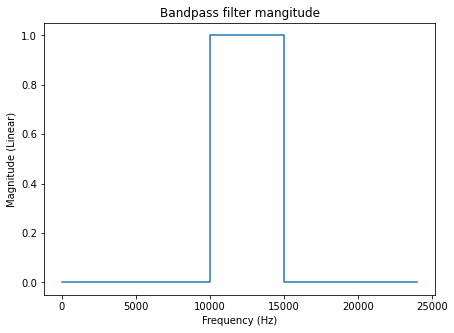

In [13]:
# Let's start by defining an example impulse response. 
# 
# E.g. if we want to approximate a bandpass between 10KHz and 15KHz with a 48KHz sampling rate, we
# need to specify the points where the magnitudes are 0., the points where the mangitude is 1. as well as the edges
# (the points where magnitude goes from 0 to 1 and vice versa.) This list must be ordered!

sample_rate = 48000.

freqs = np.array([
    0.0,               # Magnitude is 0 
    10_000.,           # Magnitude is 0
    10_000.,           # Magnitude becomes 1
    15_000.,           # Magnitude is 1
    15_000.,           # Magnitude becomes 0 
    24_000.,           # Magnitude stays 0 
])

magnitude = np.array([
    0.0,               # At 0Hz
    0.0,               # At 100Hz
    1.0,               # At 100Hz
    1.0,               # At 1000Hz
    0.0,               # At 1000Hz
    0.0,               # At 24000Hz (Nyquist)
])


fig, ax = plt.subplots(figsize=(7,5))
ax.plot(freqs, magnitude)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude (Linear)')
ax.set_title('Bandpass filter mangitude')

In [16]:

# First, we have to normalize frequency to [0., 1.]
normalized_freqs = freqs/sample_rate

# Assume IIR order filter 8
n_order = 8
a, b = yw.yulewalk(n_order, normalized_freqs, magnitude)